[View in Colaboratory](https://colab.research.google.com/github/ajoshiusc/lesion-detector/blob/master/main.ipynb)

In [1]:
!rm -rf ./lesion-detector

!git clone https://github.com/ajoshiusc/lesion-detector
!pip install nilearn
import nilearn.image
import sys
import numpy as np

sys.path.insert(0, './lesion-detector/src/SpyderNet')
  
import numpy as np
from spydernet import train_model, mod_indep_rep
from datautils import read_data
import matplotlib.pyplot as plt
from google.colab import drive

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

""" Main script that calls the functions objects"""
print('gdrive mounting')
drive.mount('/content/gdrive')
print('mounted')
""" Main script that calls the functions objects"""
data_dir = 'gdrive/My Drive/tracktbi_pilot'


data = read_data(
study_dir=data_dir, nsub=10, psize=[64, 64], npatch_perslice=64)

np.savez('gdrive/My Drive/tp_data.npz', data=data)

train_data = data #[0:-5, :, :, :]

model = train_model(train_data)

model.save('gdrive/My Drive/tp_model.h5')

test_data = data[90:95, :, :, :]

model.load_model('gdrive/My Drive/tp_model.h5') 
I, pred = mod_indep_rep(model, test_data)

plt.figure()
for j in range(5):
  plt.subplot(3, 5, j + 1)
  plt.imshow(I[j, :, :, :].squeeze(), cmap='gray')
  plt.subplot(3, 5, 5 + j + 1)
  plt.imshow(test_data[j, :, :, 0].squeeze(), cmap='gray')
  plt.subplot(3, 5, 10 + j + 1)
  plt.imshow(pred[0][j, :, :, 0].squeeze(), cmap='gray')

plt.show()

print(test_data)
print(I)

#for j in range(5):
#plt.matshow(I[j,:,:,:].squeeze())

#plt.show()



Cloning into 'lesion-detector'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 229 (delta 136), reused 138 (delta 58), pack-reused 0
Receiving objects: 100% (229/229), 15.62 MiB | 8.51 MiB/s, done.
Resolving deltas: 100% (136/136), done.


Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16651200193387792067
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281989632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11500369425332262939
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
gdrive mounting
Mounted at /content/gdrive
mounted
subject 1 
subject 2 
subject 3 
subject 4 
subject 5 
subject 6 
subject 7 
subject 8 
subject 9 
subject 10 
==Defining Model  ==
Train on 93184 samples, validate on 23296 samples
Epoch 1/1
93184/93184 [==============================] - 84s 905us/step - loss: 0.1988 - d1dec3_loss: 0.0510 - d2dec3_loss: 0.0949 - d3dec3_loss: 0.0529 - val_loss: 0.1212 - val_d1dec3_loss: 0.0346 - val_d2dec3_loss: 0.0595 - val_d3dec3_loss: 0.0271


NameError: ignored

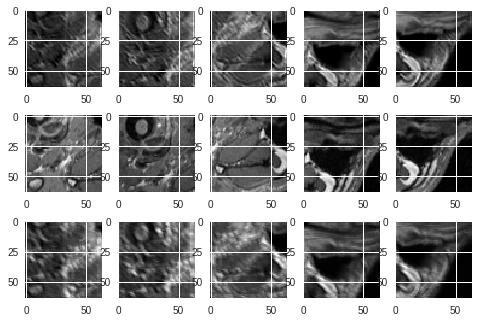

[[[[0.13826367 0.7818182  0.0034904 ]
   [0.19935691 0.6787879  0.0034904 ]
   [0.23151125 0.6606061  0.0034904 ]
   ...
   [0.07395498 0.06666667 0.7277487 ]
   [0.06752411 0.08484849 0.8516579 ]
   [0.05466238 0.08484849 1.008726  ]]

  [[0.19614148 0.8545455  0.0034904 ]
   [0.19292605 0.6545454  0.0034904 ]
   [0.19935691 0.6484848  0.0034904 ]
   ...
   [0.08360129 0.04848485 0.8429319 ]
   [0.08038585 0.07272727 0.9075044 ]
   [0.06109325 0.09090909 1.0209424 ]]

  [[0.20578778 0.90909094 0.0034904 ]
   [0.21543409 0.6969697  0.0034904 ]
   [0.18971062 0.6545454  0.0034904 ]
   ...
   [0.08038585 0.06060606 0.61082023]
   [0.09003215 0.05454545 0.6666667 ]
   [0.09003215 0.07272727 0.6876091 ]]

  ...

  [[0.6752412  0.24848485 0.0034904 ]
   [0.68488747 0.24242425 0.0034904 ]
   [0.6334405  0.12121212 0.0034904 ]
   ...
   [0.6012862  0.38181818 0.4938918 ]
   [0.6012862  0.4848485  0.5881326 ]
   [0.59807074 0.4969697  0.6579407 ]]

  [[0.6463022  0.23030303 0.0034904 ]
   [0.6

In [4]:
from keras.models import load_model

load_model('gdrive/My Drive/tp_model.h5') 
I, pred = mod_indep_rep(model, test_data)

plt.figure()
for j in range(5):
  plt.subplot(3, 5, j + 1)
  plt.imshow(I[j, :, :, :].squeeze(), cmap='gray')
  plt.subplot(3, 5, 5 + j + 1)
  plt.imshow(test_data[j, :, :, 0].squeeze(), cmap='gray')
  plt.subplot(3, 5, 10 + j + 1)
  plt.imshow(pred[0][j, :, :, 0].squeeze(), cmap='gray')

plt.show()

print(test_data)
print(I)

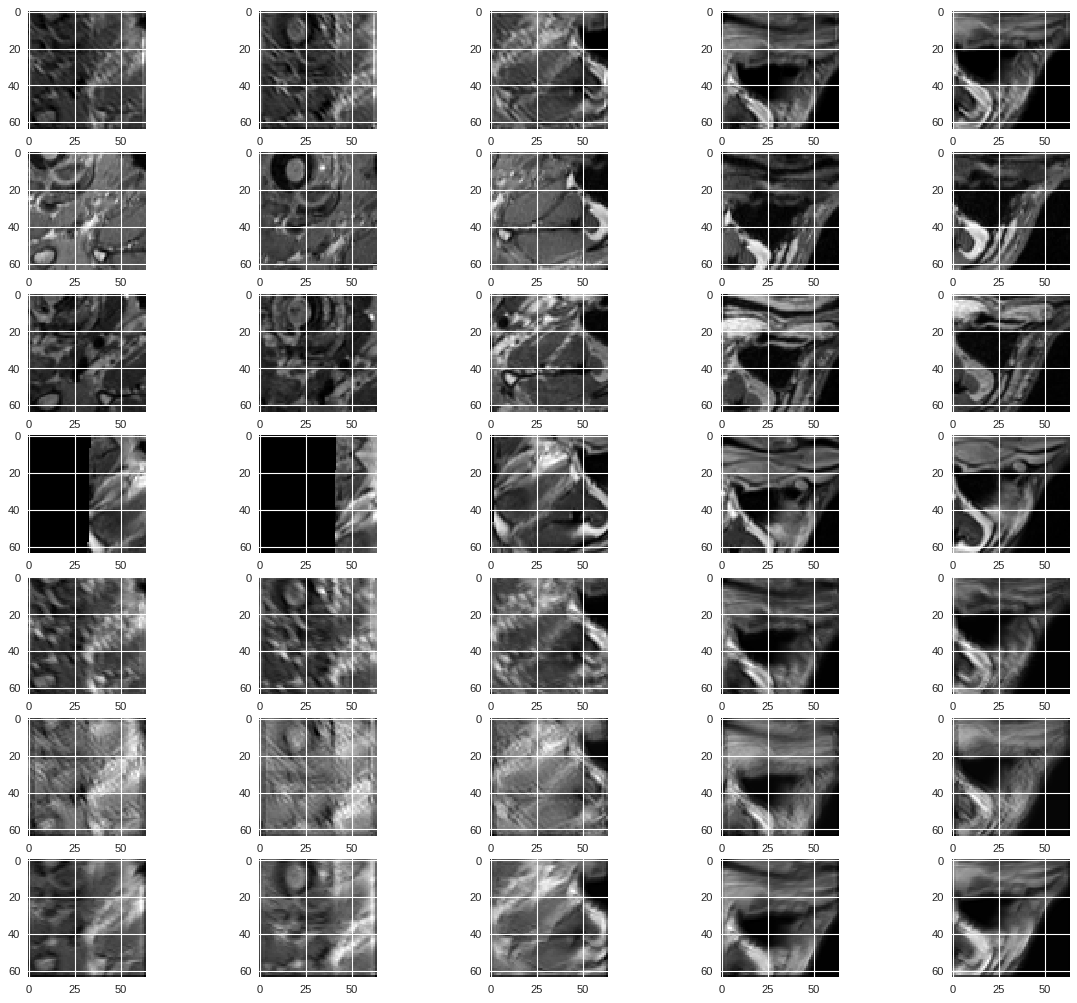

In [9]:
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    for j in range(5):
        plt.subplot(7, 5, j + 1)
        plt.imshow(I[j, :, :, :].squeeze(), cmap='gray')

        plt.subplot(7, 5, 5 + j + 1)
        plt.imshow(test_data[j, :, :, 0].squeeze(), cmap='gray')
        
        plt.subplot(7, 5, 10 + j + 1)
        plt.imshow(test_data[j, :, :, 1].squeeze(), cmap='gray')

        plt.subplot(7, 5, 15 + j + 1)
        plt.imshow(test_data[j, :, :, 2].squeeze(), cmap='gray')
        
        plt.subplot(7, 5, 20 + j + 1)
        plt.imshow(pred[0][j, :, :, 0].squeeze(), cmap='gray')

        plt.subplot(7, 5, 25 + j + 1)
        plt.imshow(pred[1][j, :, :, 0].squeeze(), cmap='gray')

        plt.subplot(7, 5, 30 + j + 1)
        plt.imshow(pred[2][j, :, :, 0].squeeze(), cmap='gray')
        
    plt.show()
